In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bill_authentication/bill_authentication.csv


In [2]:
df = pd.read_csv("/kaggle/input/bill_authentication/bill_authentication.csv")
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.shape

(1372, 5)

In [4]:
# Split features and labels
X=df.drop('Class', axis=1)
y=df['Class']

In [5]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state=13)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
# Decision Tree Model
# Train the model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    criterion = 'gini',
    splitter = 'best'
)
model.fit(X_train, y_train)

DecisionTreeClassifier()

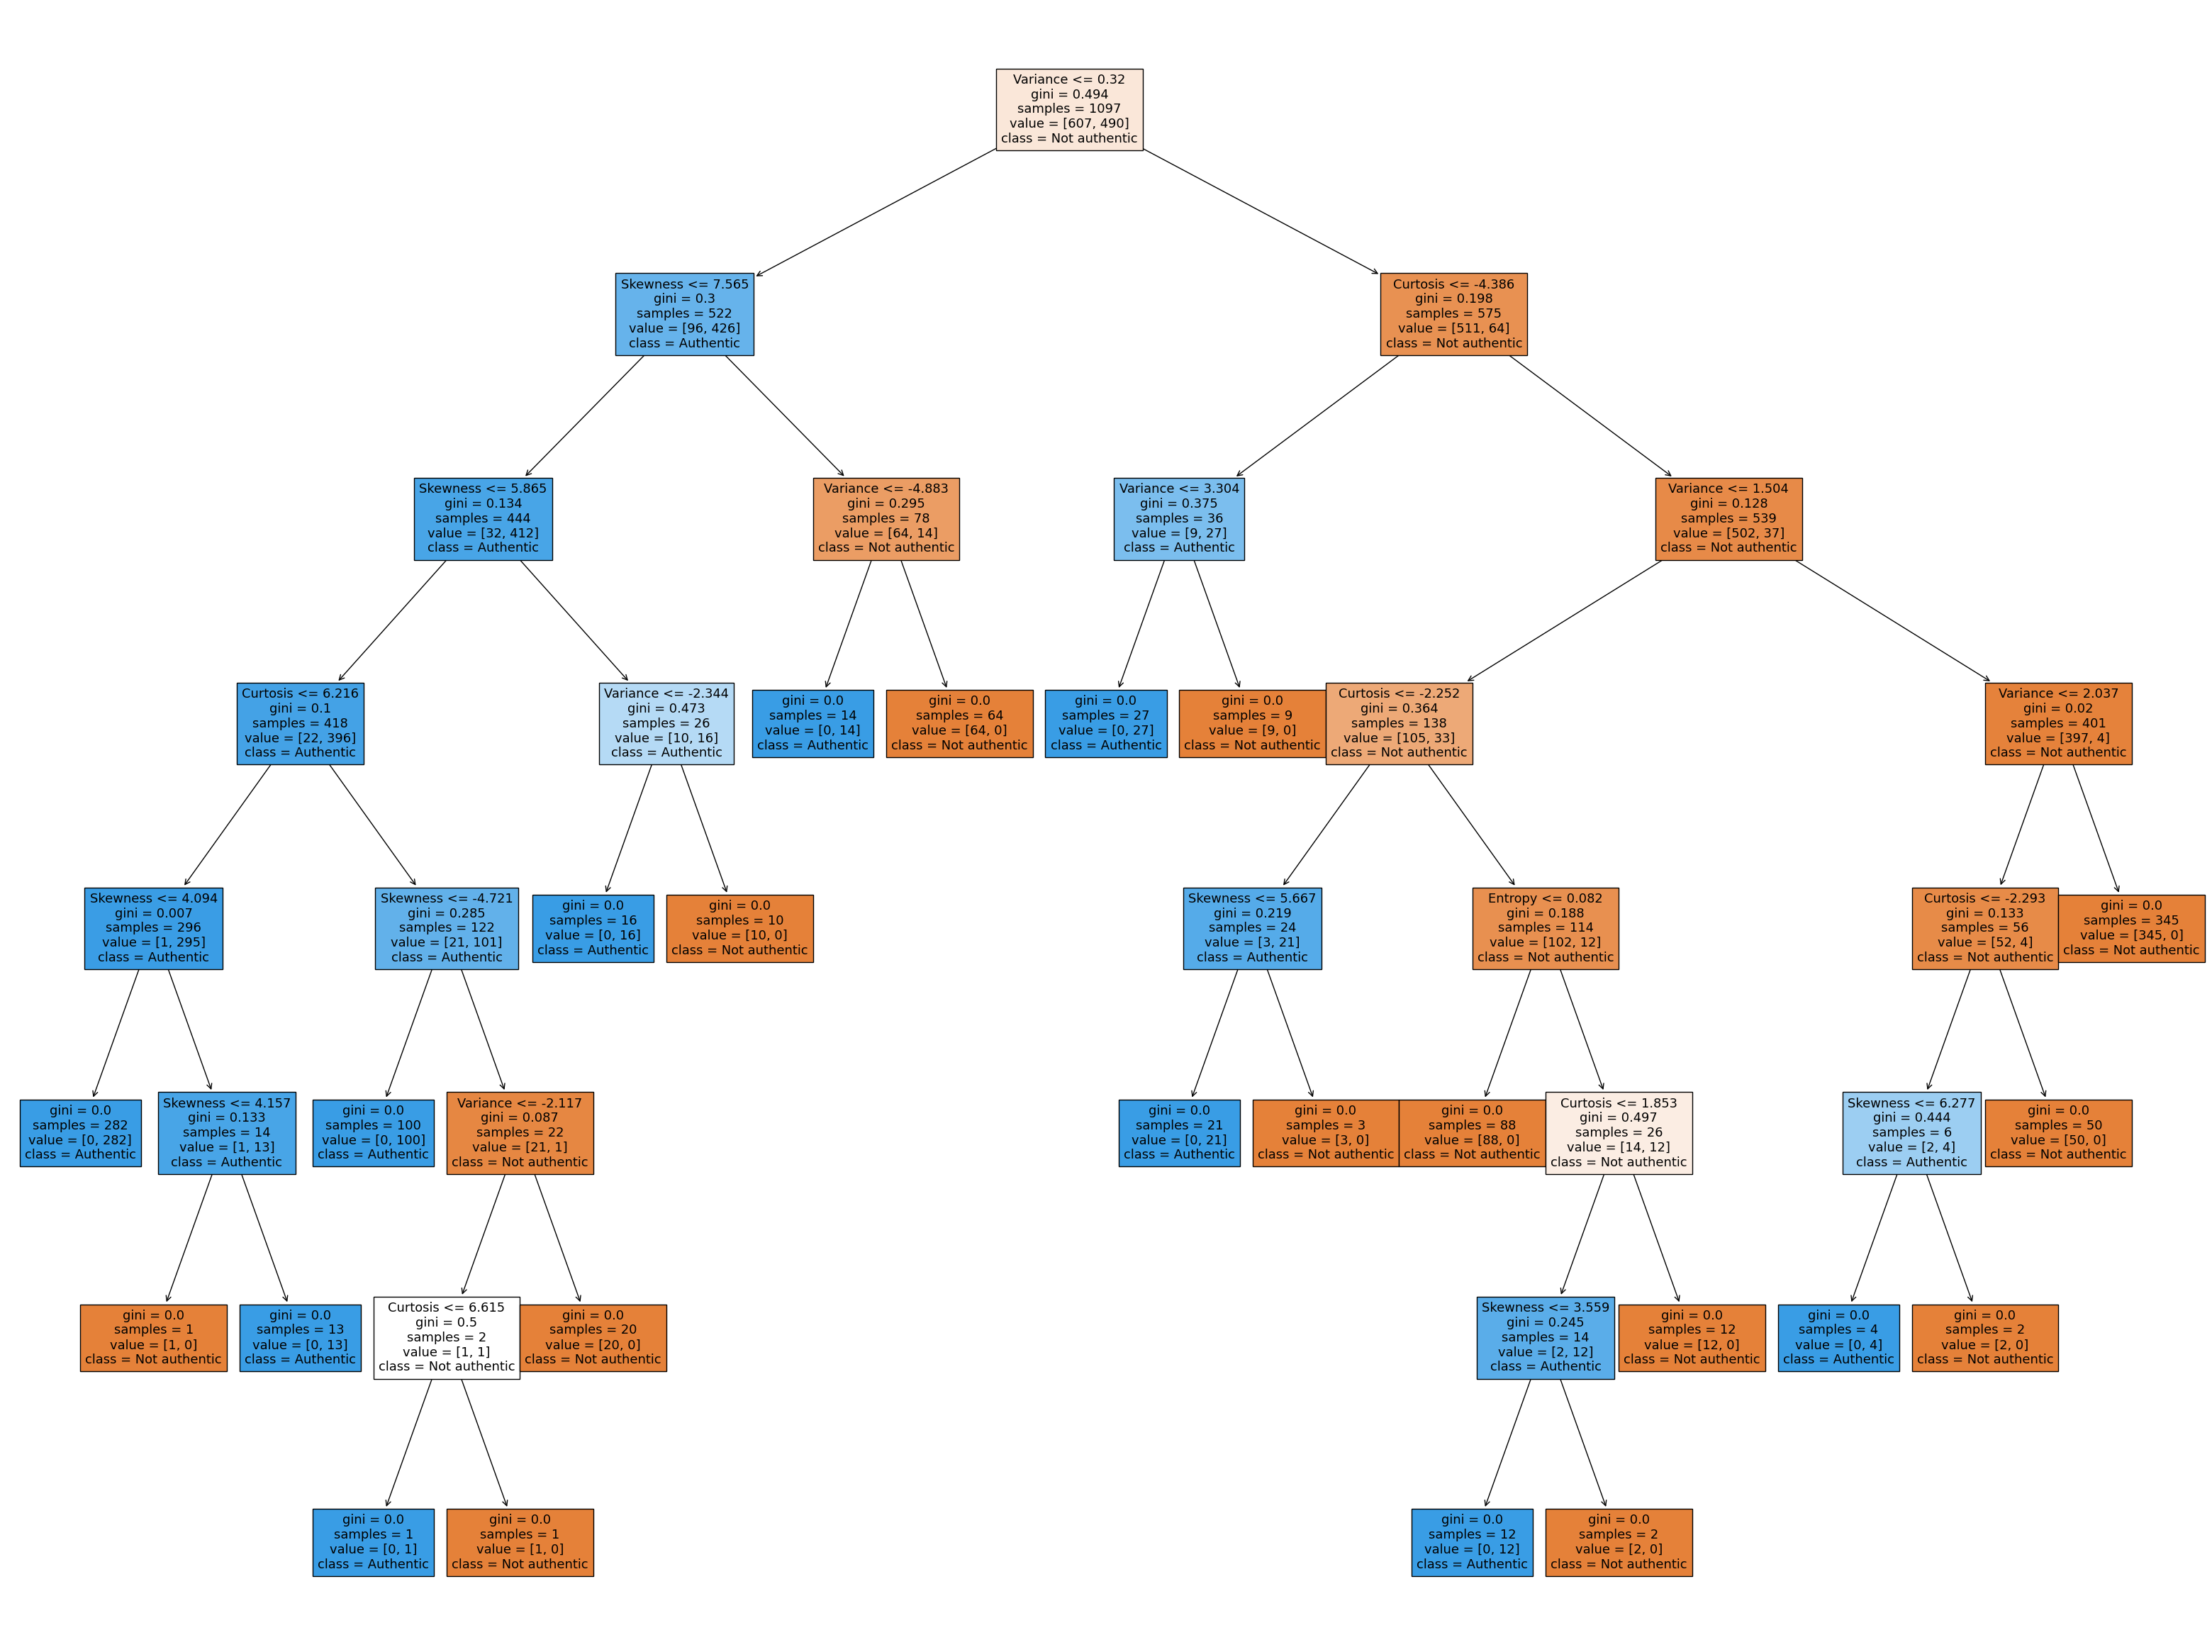

In [7]:
# Tree plotting
from matplotlib import pyplot as plt
from sklearn import tree
plt.figure(figsize=(40,30))
tree.plot_tree(
    model,
    feature_names=['Variance','Skewness', 'Curtosis', 'Entropy'], 
    class_names = ['Not authentic','Authentic'],
    filled = True
)
plt.show()

In [8]:
# Model prediction
y_pred = model.predict(X_test)

In [9]:
#Model evaluation
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, ConfusionMatrixDisplay
acc = accuracy_score(y_pred,y_test)
cm = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

Accuracy: 0.9854545454545455
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       155
           1       0.98      0.98      0.98       120

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



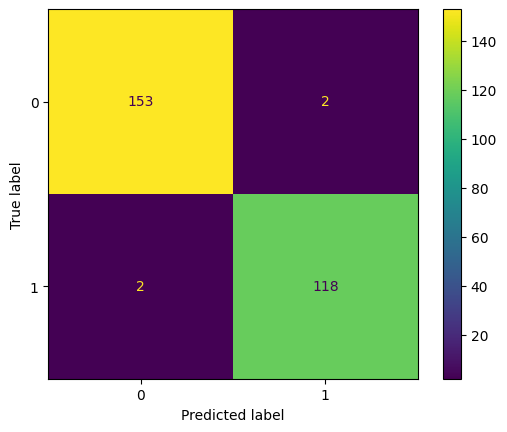

In [10]:
# Demo the evaluation
print('Accuracy:',acc)
print(classification_report(y_test,y_pred))
cm_display.plot()
plt.show()